In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
def get_systems_variables(pert_file):
    
    columns=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']
    Num_syst = pert_file['ident'].values[-1]+1
    syst_vars = pd.DataFrame(columns=columns)
    for i in range(Num_syst):
        Current_syst = pert_file[pert_file['ident'].values==i]
        planets=np.shape(Current_syst)[0]

        if(planets>0):
            initials=Current_syst[columns[:11]].values[0]
            planets=np.shape(Current_syst)[0]
            row_vals=np.append(initials,planets)

            planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
            row_vals=np.append(row_vals,planet_mass)

            eff=planet_mass/Current_syst['emed'].values[0]
            row_vals=np.append(row_vals,eff)
        else:
            row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
        syst_vars.loc[i]=row_vals
    return syst_vars

#High Perturbation System Analysis
highp_vars = get_systems_variables(highPerturbation)
highp_vars = highp_vars[highp_vars['num_planets'].values!=0]
#Low Perturbation System Analysis
lowp_vars = get_systems_variables(lowPerturbation)
lowp_vars = lowp_vars[lowp_vars['num_planets'].values!=0]

# Luego se procede a entrenar una SVM para cada una de las salidas
## Número de planetas

In [19]:
salidas = ['num_planets','mass_planets','mass_efficiency']

#Dividing Input and Output Variables
Xh = highp_vars[['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']]
Yh = highp_vars[salidas[0]]

Xl = lowp_vars[['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']] 
Yl = lowp_vars[salidas[0]]

#Scaling Input values
scaler = preprocessing.StandardScaler().fit(Xh)
Xhs = scaler.transform(Xh)

scaler = preprocessing.StandardScaler().fit(Xl)
Xls = scaler.transform(Xl)

#High Perturbation SVM
Cs=np.linspace(0.001,5,num=20)
Res = np.zeros([len(Cs)])
for (c,i) in zip(Cs,range(len(Cs))):
    clf = svm.SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, Xhs, Yh, cv=5)
    Res[i]=np.mean(scores)



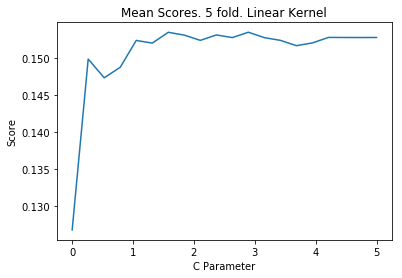

In [24]:
plt.plot(Cs,Res)
plt.xlabel('C Parameter')
plt.ylabel('Score')
plt.title('Mean Scores. 5 fold. Linear Kernel')